# Fluorescence Recovery After Photobleaching

In [6]:
#importing the required modules
import numpy as np #Numerical Python
import scipy #Scientific Python

%matplotlib inline
import mpld3 #For making nice looking plots
from mpld3 import plugins
mpld3.enable_notebook()
import matplotlib
from matplotlib import pylab

#For making interactive user interfaces (buttons and sliders and such)
import ipywidgets as widgets
from ipywidgets import Layout, interact, fixed

#Loading the particle tracking software
import sys
sys.path.append("Z:\\Code\\BeadTracking\\track") #Locate code
import tiff_file #Ignore any warnings importing this may cause

In [3]:
#Now let's locate the data
data_directory = "Z:\\381W\\Fall2017_381W\\ExampleData\FRAP\\"
data_file = "20x004.tif"

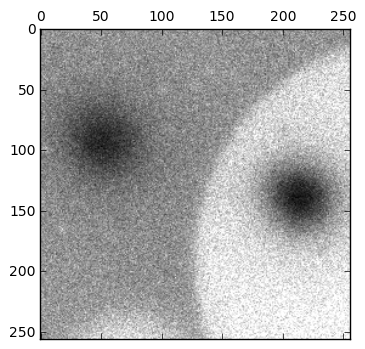

In [17]:
first_postbleach_frame = 3 #start counting at frame=0
all_frames = tiff_file.imread(data_directory+data_file)
postbleach_frame = all_frames[first_postbleach_frame]
fig,ax = pylab.subplots()
ax.matshow(postbleach_frame,cmap=matplotlib.cm.gray, interpolation=None)
plugins.connect(fig, plugins.MousePosition(fontsize=14))

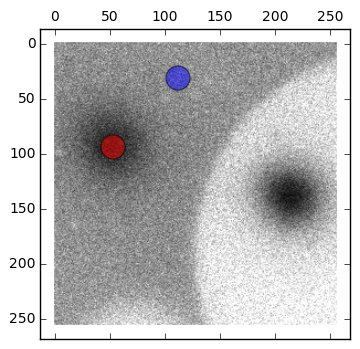

In [64]:
#Choose coordinates of the *center* of a bleached region
y_center_bleach = 94
x_center_bleach = 53

#Choose coordinates of the *center* of some background region
y_center_bg = 31
x_center_bg = 112

fig,ax = pylab.subplots()
ax.matshow(postbleach_frame,cmap=matplotlib.cm.gray, interpolation=None)
ax.scatter(x_center_bleach, y_center_bleach, s=300, alpha=0.5, c='r')
ax.scatter(x_center_bg, y_center_bg, s=300, alpha=0.5, c='b')
plugins.connect(fig, plugins.MousePosition(fontsize=14))

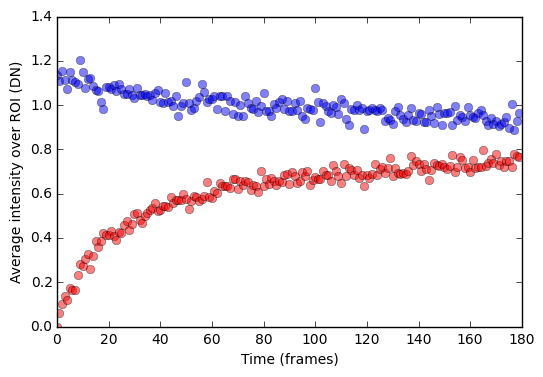

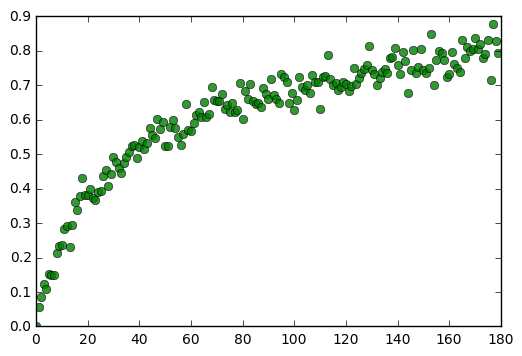

In [65]:
roi_size = 8
roi_bleach = np.array([[x_center_bleach-roi_size/2, x_center_bleach+roi_size/2],
                       [y_center_bleach-roi_size/2, y_center_bleach+roi_size/2]])
intensity_bleach_roi = all_frames[first_postbleach_frame:, 
                                  roi_bleach[1][0]:roi_bleach[1][1], 
                                  roi_bleach[0][0]:roi_bleach[0][1]].mean(axis=-1).mean(axis=-1)
pre_bleach_itensity = all_frames[:first_postbleach_frame, 
                                 roi_bleach[1][0]:roi_bleach[1][1], 
                                 roi_bleach[0][0]:roi_bleach[0][1]].mean()

roi_bg = np.array([[x_center_bg-roi_size/2, x_center_bg+roi_size/2],
                   [y_center_bg-roi_size/2, y_center_bg+roi_size/2]])
intensity_bg_roi = all_frames[first_postbleach_frame:,
                              roi_bg[1][0]:roi_bg[1][1], 
                              roi_bg[0][0]:roi_bg[0][1]].mean(axis=-1).mean(axis=-1)
pre_bg_intensity = all_frames[first_postbleach_frame:,
                              roi_bg[1][0]:roi_bg[1][1], 
                              roi_bg[0][0]:roi_bg[0][1]].mean()

bleach_region_signal_A = (intensity_bleach_roi-intensity_bleach_roi[0])/(pre_bleach_itensity-intensity_bleach_roi[0])
bg_region_signal_A = (intensity_bg_roi-intensity_bleach_roi[0])/(pre_bg_intensity-intensity_bleach_roi[0])

fig,ax = pylab.subplots()

ax.plot(bleach_region_signal_A,'ro',alpha=0.5)
ax.plot(bg_region_signal_A,'bo',alpha=0.5)
ax.set_xlabel("Time (frames)")
ax.set_ylabel("Average intensity over ROI (DN)")


intensity_norm_A = bleach_region_signal_A/bg_region_signal_A

fig2,ax2 = pylab.subplots()
ax2.plot(intensity_norm_A,'go',alpha=0.8)

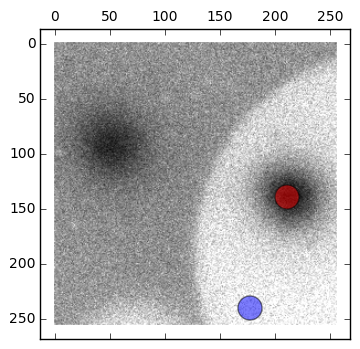

In [66]:
#Choose coordinates of the *center* of a bleached region
y_center_bleach = 139
x_center_bleach = 211

#Choose coordinates of the *center* of some background region
y_center_bg = 240
x_center_bg = 177

fig,ax = pylab.subplots()
ax.matshow(postbleach_frame,cmap=matplotlib.cm.gray, interpolation=None)
ax.scatter(x_center_bleach, y_center_bleach, s=300, alpha=0.5, c='r')
ax.scatter(x_center_bg, y_center_bg, s=300, alpha=0.5, c='b')
plugins.connect(fig, plugins.MousePosition(fontsize=14))

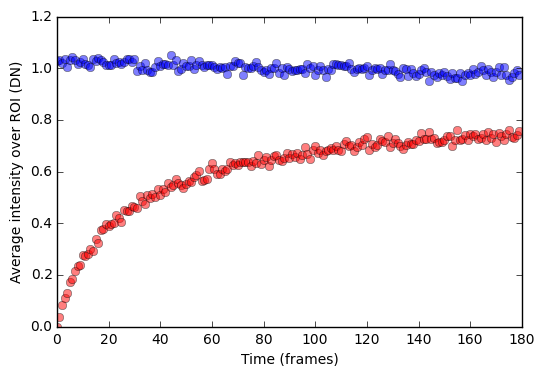

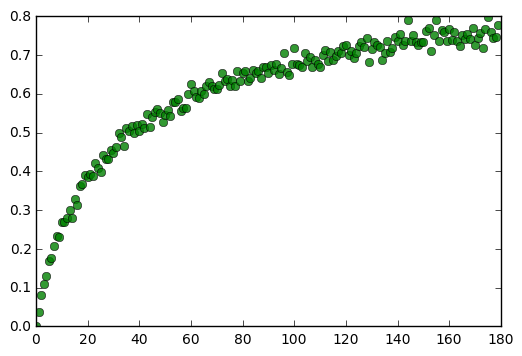

In [67]:
roi_size = 8
roi_bleach = np.array([[x_center_bleach-roi_size/2, x_center_bleach+roi_size/2],
                       [y_center_bleach-roi_size/2, y_center_bleach+roi_size/2]])
intensity_bleach_roi = all_frames[first_postbleach_frame:, 
                                  roi_bleach[1][0]:roi_bleach[1][1], 
                                  roi_bleach[0][0]:roi_bleach[0][1]].mean(axis=-1).mean(axis=-1)
pre_bleach_itensity = all_frames[:first_postbleach_frame, 
                                 roi_bleach[1][0]:roi_bleach[1][1], 
                                 roi_bleach[0][0]:roi_bleach[0][1]].mean()

roi_bg = np.array([[x_center_bg-roi_size/2, x_center_bg+roi_size/2],
                   [y_center_bg-roi_size/2, y_center_bg+roi_size/2]])
intensity_bg_roi = all_frames[first_postbleach_frame:,
                              roi_bg[1][0]:roi_bg[1][1], 
                              roi_bg[0][0]:roi_bg[0][1]].mean(axis=-1).mean(axis=-1)
pre_bg_intensity = all_frames[first_postbleach_frame:,
                              roi_bg[1][0]:roi_bg[1][1], 
                              roi_bg[0][0]:roi_bg[0][1]].mean()

bleach_region_signal_B = (intensity_bleach_roi-intensity_bleach_roi[0])/(pre_bleach_itensity-intensity_bleach_roi[0])
bg_region_signal_B = (intensity_bg_roi-intensity_bleach_roi[0])/(pre_bg_intensity-intensity_bleach_roi[0])

fig,ax = pylab.subplots()

ax.plot(bleach_region_signal_B,'ro',alpha=0.5)
ax.plot(bg_region_signal_B,'bo',alpha=0.5)
ax.set_xlabel("Time (frames)")
ax.set_ylabel("Average intensity over ROI (DN)")


intensity_norm_B = bleach_region_signal_B/bg_region_signal_B

fig2,ax2 = pylab.subplots()
ax2.plot(intensity_norm_B,'go',alpha=0.8)

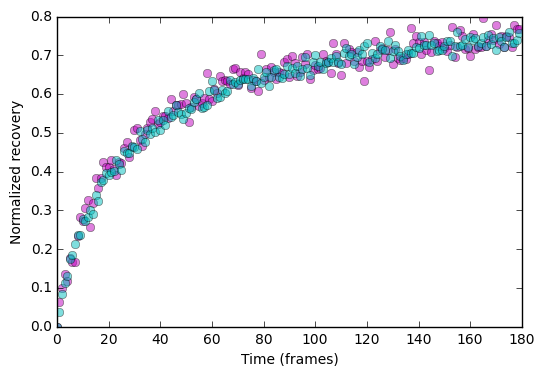

In [70]:
fig,ax = pylab.subplots()
ax.plot(bleach_region_signal_A,'mo',alpha=0.5)
ax.plot(bleach_region_signal_B,'co',alpha=0.5)

ax.set_xlabel("Time (frames)")
ax.set_ylabel("Normalized recovery")